## Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.image import imread
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing import image

In [11]:
import os

## Load Data 

In [9]:
dataset = "../Dropbox/DATASET/"
data_train = (dataset+"/train")
data_test = (dataset+"/test")

lengt_data_x_train = "../Dropbox/DATASET/train/COVID19"
lengt_data_y_train = "../Dropbox/DATASET/train/NORMAL"
lengt_data_x_test = "../Dropbox/DATASET/test/COVID19"
lengt_data_y_test = "../Dropbox/DATASET/test/NORMAL"

In [11]:
lengt_data_train = len(os.listdir(lengt_data_x_train)) + len(os.listdir(lengt_data_y_train))
lengt_data_test = len(os.listdir(lengt_data_x_test)) + len(os.listdir(lengt_data_y_test))


print(lengt_data_train, lengt_data_test)

1726 433


## Augmentasi Data 

In [12]:
generator = ImageDataGenerator(
    shear_range=0.1,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1/255,
)

In [15]:
train_generator = generator.flow_from_directory (
    data_train,
    target_size=(400,400),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
)

Found 1726 images belonging to 2 classes.


In [16]:
test_generator = generator.flow_from_directory (
    data_test,
    target_size=(400,400),
    color_mode='rgb',
    class_mode='binary',
    batch_size=32,
)

Found 433 images belonging to 2 classes.


## Model Arsitektur CNN 

In [17]:
model = Sequential()

#layer pertama
model.add(Conv2D(filters = 32, padding = "same", kernel_size = (2,2), strides = (2,2), activation = "relu", input_shape = [400,400,3]))
model.add(MaxPool2D(pool_size = (2,2)))

#layer kedua
model.add(Conv2D(filters = 32, padding = "same", kernel_size = (2,2), strides = (2,2), activation = "relu", input_shape = [400,400,3]))
model.add(MaxPool2D(pool_size = (2,2)))

# layer ketiga
model.add(Conv2D(filters = 64, padding = "same", kernel_size = (2,2), strides = (2,2), activation = "relu", input_shape = [400,400,3]))
model.add(MaxPool2D(pool_size = (2,2)))

#flattening
model.add(Flatten())

#fully connected layer
model.add(Dense(units = 128, activation = "relu"))
model.add(Dense(units = 1, activation = "sigmoid"))
model.compile(loss = "binary_crossentropy", optimizer = "adam" , metrics = ["accuracy"])

In [25]:
# Callback agar model CNN berhenti menjalankan proses training saat mencapai nilai akurasi 99%
class MyCallback (tf.keras.callbacks.Callback):
    def on_epoch_end (self, epoch, logs={}):
        if(logs.get('accuracy')>0.99):
            print("\nAkurasi telah mencapai 99% membatalkan proses training")
            self.model.stop_training = True

callbacks = MyCallback()

In [26]:
checkpoint = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

In [28]:
from time import time

start = time()

history = model.fit(
    train_generator,
    steps_per_epoch= lengt_data_train // 32,
    epochs= 50,
    validation_data=test_generator,
    validation_steps= lengt_data_test // 32, 
    callbacks=[checkpoint, callbacks]
)

print(time()-start)

Epoch 1/50
53/53 [==============================] - 149s 3s/step - loss: 0.4474 - accuracy: 0.7715 - val_loss: 0.2727 - val_accuracy: 0.8726
Epoch 2/50
53/53 [==============================] - 134s 3s/step - loss: 0.2451 - accuracy: 0.9067 - val_loss: 0.2346 - val_accuracy: 0.9038
Epoch 3/50
53/53 [==============================] - 138s 3s/step - loss: 0.1812 - accuracy: 0.9315 - val_loss: 0.1317 - val_accuracy: 0.9447
Epoch 4/50
53/53 [==============================] - 134s 3s/step - loss: 0.1450 - accuracy: 0.9475 - val_loss: 0.0941 - val_accuracy: 0.9760
Epoch 5/50
53/53 [==============================] - 134s 3s/step - loss: 0.1127 - accuracy: 0.9599 - val_loss: 0.1071 - val_accuracy: 0.9615
Epoch 6/50
53/53 [==============================] - 136s 3s/step - loss: 0.1185 - accuracy: 0.9569 - val_loss: 0.0818 - val_accuracy: 0.9784
Epoch 7/50
53/53 [==============================] - 136s 3s/step - loss: 0.1394 - accuracy: 0.9498 - val_loss: 0.0554 - val_accuracy: 0.9832
Epoch 8/50
53

In [29]:
trainTime = 6210.958900928497

def fill(num):
    return str(num).zfill(2)

hours = int(trainTime // 3600)
minutes = int((trainTime - (hours * 3600)) // 60)
seconds = int(round(trainTime - (hours*3600 + minutes*60)))
print('Time: {}:{}:{}'.format(fill(hours), fill(minutes), fill(seconds)))

Time: 01:43:31


In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

## Grafik Performa CNN 

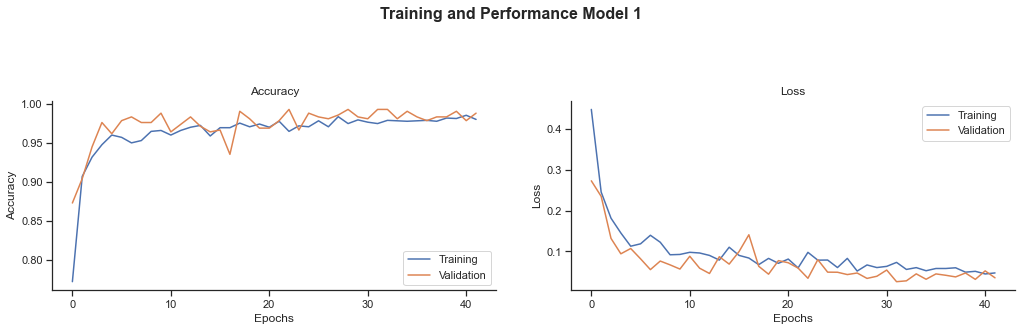

In [97]:
fig, axarr = plt.subplots(1,2, figsize=(15,5), sharex=True)

sns.set(style="ticks", font_scale = 1)
sns.despine(top=True, right=True, left=False, bottom=False)

historyDF = pd.DataFrame.from_dict(history.history)
ax = sns.lineplot(x = historyDF.index, y = history.history['accuracy'], ax=axarr[0], label="Training");
ax = sns.lineplot(x = historyDF.index, y = history.history['val_accuracy'], ax=axarr[0], label="Validation");
ax.set_ylabel('Accuracy')

ax = sns.lineplot(x = historyDF.index, y = history.history['loss'], ax=axarr[1], label="Training");
ax = sns.lineplot(x = historyDF.index, y = history.history['val_loss'], ax=axarr[1], label="Validation");
ax.set_ylabel('Loss')


axarr[0].set_title('Accuracy')
axarr[1].set_title('Loss')

for ax in axarr:
    ax.set_xlabel('Epochs')

plt.suptitle('Training and Performance Model 1', fontsize=16, weight='bold');
plt.savefig('Training Model1.png')
fig.tight_layout(pad=3.0)
plt.show()

## Confusion Matrix Manual 

In [32]:
covid = 0
normal = 0
for i in range(460, 576): 
    test_image = image.load_img('../Dropbox/DATASET/test/COVID19/COVID19(' + str(i) + ').jpg', target_size = (400, 400))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    if result[0][0] == 0:
        prediction = 'COVID19'
        covid = covid + 1
    else:
        prediction = 'NORMAL'
        normal = normal + 1

# Mencetak hasil prediksinya agar bisa dibaca
print("Jumlah Covid :" + str(covid))    
print("Jumlah Normal :" + str(normal))

Jumlah Covid :81
Jumlah Normal :35


In [33]:
covid = 0
normal = 0
for i in range(1266, 1583): 
    test_image = image.load_img('../Dropbox/DATASET/test/NORMAL/NORMAL(' + str(i) + ').jpg', target_size = (400, 400))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    if result[0][0] == 0:
        prediction = 'COVID19'
        covid = covid + 1
    else:
        prediction = 'NORMAL'
        normal = normal + 1

# Mencetak hasil prediksinya agar bisa dibaca
print("Jumlah Covid :" + str(covid))    
print("Jumlah Normal :" + str(normal))

Jumlah Covid :3
Jumlah Normal :314


In [34]:
tp = 81
tn = 314
fp = 3
fn = 35

akurasi = (tp+tn)/(tp+tn+fn+fp)
print('Accuracy  : {:.2f}'.format(akurasi))

precision = tp/(tp+fp)
print('Precision : {:.2f}'.format(precision))


recal = tp/(tp+fn)
print('Recall    : {:.2f}'.format(recal))


f1_score = (2*precision*recal)/(precision+recal)
print('F1_Score  : {:.2f}'.format(f1_score))

Accuracy  : 0.91
Precision : 0.96
Recall    : 0.70
F1_Score  : 0.81


## Confusion Matrix Library 

In [6]:
test_data_dir = "../Dropbox/DATASET/test/"

In [7]:
test_datagen = ImageDataGenerator(
    rescale=1. / 255, 
)

In [8]:
generator = test_datagen.flow_from_directory(
        test_data_dir,
        target_size=(400, 400),
        batch_size=1,
        class_mode='binary',
        shuffle=False)

Found 433 images belonging to 2 classes.


In [9]:
predict = loaded_model.predict(generator)

In [12]:
import re
test_dir = "../Dropbox/DATASET/testing/"
y_actual = []

for filename in os.listdir(test_dir):
    if re.search('COVID19', filename):
        y_actual.append(0)
    else:
        y_actual.append(1) 

In [13]:
y_predict = []

for list_acc in predict:
    for acc in list_acc:
        if acc > 0.5:
            y_predict.append(1)
        else:
            y_predict.append(0)

In [16]:
confusion_matrix(y_actual, y_predict) 

array([[113,   3],
       [  1, 316]], dtype=int64)

<AxesSubplot:>

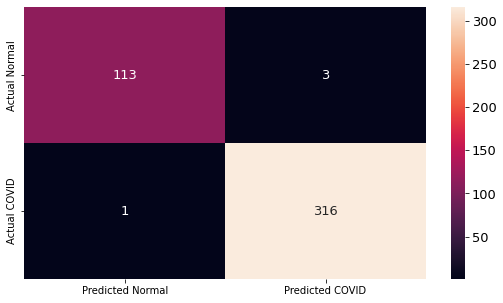

In [15]:
from sklearn.metrics import classification_report,confusion_matrix
cm = pd.DataFrame(data=confusion_matrix(y_actual, y_predict, labels=[0, 1]),index=["Actual Normal", "Actual COVID"],
columns=["Predicted Normal", "Predicted COVID"])
import seaborn as sns
fig, ax = plt.subplots(figsize=(9,5))
plt.rcParams.update({'font.size': 13})
sns.heatmap(cm,annot=True,fmt="d",ax=ax)

In [85]:
from sklearn.metrics import classification_report
print (classification_report(y_actual, y_predict, target_names =['Covid19','Normal']))

report = classification_report(y_actual, y_predict, target_names =['Covid19','Normal'], output_dict=True)
df = pd.DataFrame(report).transpose()
df

              precision    recall  f1-score   support

     Covid19       0.99      0.97      0.98       116
      Normal       0.99      1.00      0.99       317

    accuracy                           0.99       433
   macro avg       0.99      0.99      0.99       433
weighted avg       0.99      0.99      0.99       433



,precision,recall,f1-score,support
Covid19,0.991228,0.974138,0.982609,116.000000
Normal,0.990596,0.996845,0.993711,317.000000
accuracy,0.990762,0.990762,0.990762,0.990762
macro avg,0.990912,0.985492,0.988160,433.000000
weighted avg,0.990765,0.990762,0.990736,433.000000


In [92]:
df.to_csv('Confusion Matrix Model 1.csv')

### Confusion Matrix in each class 

**Overall Results**
Accuracy Result : 99.08%
Precision Result: 99.06%
Recall Result   : 99.68%
F1-Score Result : 99.37%


<Figure size 432x288 with 0 Axes>

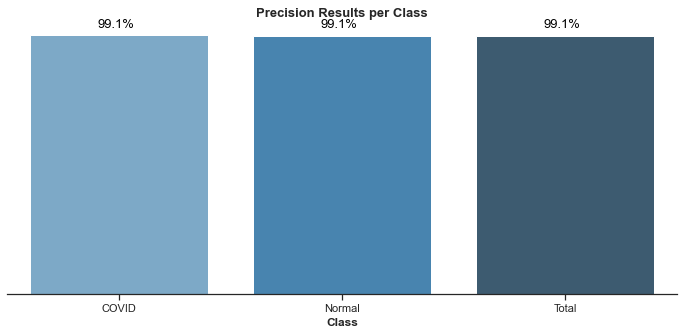

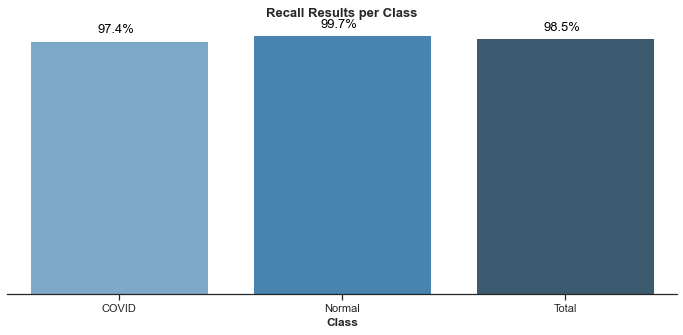

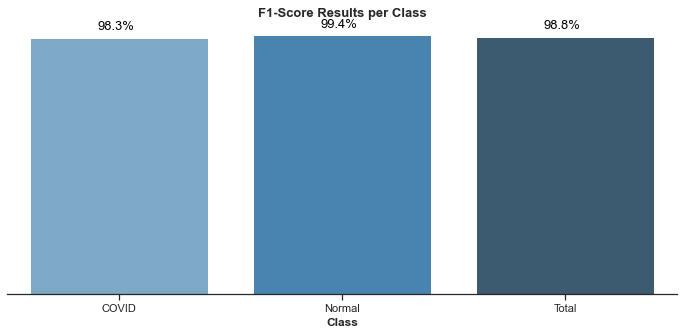

In [94]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score
#Accuracy Result
acc = accuracy_score(y_actual, y_predict)
#Precision, Recall and F-Score (For the whole dataset)
results_all = precision_recall_fscore_support(y_actual, y_predict, average='macro',zero_division = 1)
#Precision, Recall and F-Score (For each Class)
results_class = precision_recall_fscore_support(y_actual, y_predict, average=None, zero_division = 1)

#Organise the Results into a Dataframe
metric_columns = ['Precision','Recall', 'F1-Score','S']
all_df = pd.concat([pd.DataFrame(list(results_class)).T,pd.DataFrame(list(results_all)).T])
all_df.columns = metric_columns
all_df.index = ['COVID','Normal','Total']

#Function to plot the metrics into a nice bar Plot
def metrics_plot(df,metric):
    plt.figure(figsize=(12,5))
    ax = sns.barplot(data =df, x=df.index, y = metric,palette = "Blues_d")
    #Bar Labels
    for p in ax.patches:
        ax.annotate("%.1f%%" % (100*p.get_height()), (p.get_x() + p.get_width() / 2., abs(p.get_height())),
        ha='center', va='bottom', color='black', xytext=(-3, 5),rotation = 'horizontal',textcoords='offset points')
    sns.despine(top=True, right=True, left=True, bottom=False)
    ax.set_xlabel('Class',fontsize = 12,weight = 'bold')
    ax.set_ylabel(metric,fontsize = 12,weight = 'bold')
    ax.set(yticklabels=[])
    ax.axes.get_yaxis().set_visible(False) 
    plt.title(metric+ ' Results per Class', fontsize = 13,weight = 'bold');
    
metrics_plot(all_df, 'Precision')#Results by Class
metrics_plot(all_df, 'Recall')#Results by Class
metrics_plot(all_df, 'F1-Score')#Results by Class
print('**Overall Results**')
print('Accuracy Result : %.2f%%'%(acc*100)) #Accuracy of the whole Dataset
print('Precision Result: %.2f%%'%(all_df.iloc[1,0]*100))#Precision of the whole Dataset
print('Recall Result   : %.2f%%'%(all_df.iloc[1,1]*100))#Recall of the whole Dataset
print('F1-Score Result : %.2f%%'%(all_df.iloc[1,2]*100))#F-Score of the whole Dataset

## ROC Curve 

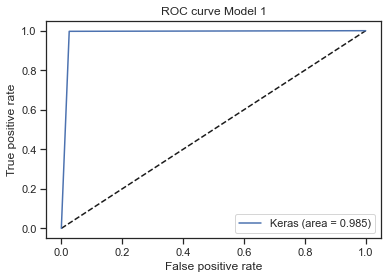

In [96]:
from sklearn.metrics import roc_curve
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_actual, y_predict)
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve Model 1')
plt.legend(loc='best')
plt.savefig('ROC Curve Model 1.png')
plt.show()

## Build Image Identification 

In [87]:
covid = 0
normal = 0
for i in range(1, 1001): 
    test_image = image.load_img('../Download/dataset/train/COVID/COVID-' + str(i) + '.png', target_size = (400, 400))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    if result[0][0] == 0:
        prediction = 'COVID19'
        covid = covid + 1
    else:
        prediction = 'NORMAL'
        normal = normal + 1

print("Jumlah Covid  :" + str(covid))    
print("Jumlah Normal :" + str(normal))

Jumlah Covid :762
Jumlah Normal :238


#### 1000 Images Covid 

From 1000 images from outside dataset use,
Model 1 can suggest 762 has Covid Infected 

In [89]:
covid = 0
normal = 0
for i in range(1, 1001): 
    test_image = image.load_img('../Download/dataset/train/NORMAL/Normal-' + str(i) + '.png', target_size = (400, 400))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(test_image)
    if result[0][0] == 0:
        prediction = 'COVID19'
        covid = covid + 1
    else:
        prediction = 'NORMAL'
        normal = normal + 1

print("Jumlah Covid :" + str(covid))    
print("Jumlah Normal :" + str(normal))

Jumlah Covid :25
Jumlah Normal :975


#### 1000 Images Normal

From 1000 images from outside dataset use, Model 1 can suggest 975 has Normal Lung

## Save Model & Weight 

In [95]:
#save model
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


## Load Model 

In [3]:
from keras.models import model_from_json
json_file = open('../Model_Final/Model 1/model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("../Model_Final/Model 1/model.h5")
print("Loaded model from disk")

Loaded model from disk


In [2]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 200, 200, 32)      416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 100, 100, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 32)        4128      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 64)        8256      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

In [3]:
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## PR Curve 

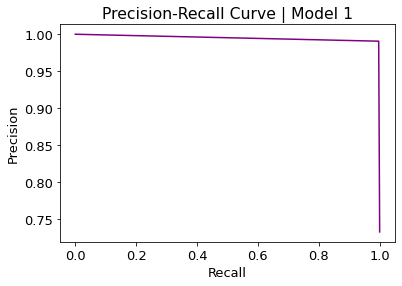

In [35]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
precision, recall, thresholds = precision_recall_curve(y_actual, y_predict)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve | Model 1')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

Logistic: f1=0.994 auc=0.995


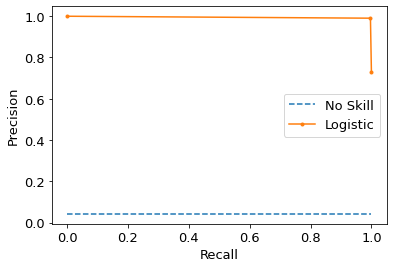

In [32]:
# precision-recall curve and f1
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
lr_precision, lr_recall, _ = precision_recall_curve(y_actual, y_predict)
lr_f1, lr_auc = f1_score(y_actual, y_predict), auc(lr_recall, lr_precision)

# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))

# plot the precision-recall curves
no_skill = len(test_data_dir[test_data_dir==1]) / len(test_data_dir)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()